In [23]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import gym
import time
from tqdm import tqdm
import json
from livelossplot import PlotLosses
from utils.utils import get_similarity, get_loader
from utils.utils import get_dataset, CreateTorchDataset
from torch.utils.data import Dataset, DataLoader
from utils.models import PendulumDynamicsModel, PendulumRewardModel, CartpoleDynamicsModel, PendulumDynamicsModelSuccessor
from utils.plot_utils import plot_task_similarity_score
from utils.utils import train_model, eval_model

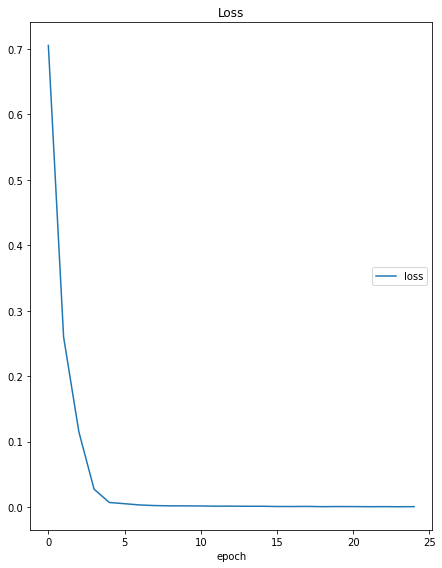

Loss
	loss             	 (min:    0.000, max:    0.705, cur:    0.001)
completed!


In [3]:
def trainer(dpath, mname):
    # create dataset
    custom_dataset = get_dataset(dpath, ds_type='dynamics')
    pendulum_data = CreateTorchDataset(custom_dataset, state_dim=3, 
                                        action_dim=1, ds_type='dynamics')
    model = PendulumDynamicsModel(num_features=4)  # numebr of inputer features
    lr = 0.0001
    num_epochs = 25
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss = nn.MSELoss()
    model_name = mname
    batch_size = 32
    train_model(pendulum_data, model, lr,
                    num_epochs, optimizer,
                    loss, batch_size, 
                    model_name=model_name)
                    
    print('completed!')

# path to json dataset
path0 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_0_train.json'
path1 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_1_train.json'
path2 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_2_train.json'
path3 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_3_train.json'
path4 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_4_train.json'
path5 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_5_train.json'


trainer(path0, 'pendulum_0')
trainer(path1, 'pendulum_1')

In [43]:
# evaluation 
num = 0
eval_path = f'/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum/Pendulum_dataset_{num}_train.json'
custom_dataset = get_dataset(eval_path, ds_type='dynamics')
pendulum_test = CreateTorchDataset(custom_dataset, state_dim=3, 
                                action_dim=1, ds_type='dynamics')

test_loader = DataLoader(dataset=pendulum_test, 
                        batch_size=5, 
                        shuffle=True)
                        
model = PendulumDynamicsModel(num_features=4)  # numebr of inputer features
trained_model_path = f'saved_data/pendulum_{num}.pth'

eval_mean, eval_std = eval_model(model, trained_model_path, cartpole_test)
print(eval_mean, eval_std)

0.022949337096170974 0.017078555775215012


In [46]:
for k in range(1):
    x, y = next(iter(test_loader))
    pred, z = model(x.float())
    print(f'label: {y}')
    print(f'pred: {pred}')
    print('-------------')

label: tensor([[-0.9934, -0.1148,  3.4870],
        [ 0.9975, -0.0712, -3.0218],
        [-0.9983,  0.0582, -0.5696],
        [-0.1364,  0.9907, -4.2466],
        [ 0.4796,  0.8775, -5.1246]], dtype=torch.float64)
pred: tensor([[-1.0016, -0.1142,  3.4535],
        [ 1.0077, -0.1197, -3.1036],
        [-1.0198,  0.0551, -0.5756],
        [-0.1234,  1.0058, -4.5873],
        [ 0.4740,  0.9070, -5.4513]], grad_fn=<AddmmBackward0>)
-------------


In [26]:
model_source_path = 'saved_data/pendulum_1.pth'
model = PendulumDynamicsModelSuccessor(num_features=4)
model.load_state_dict(torch.load(model_source_path, map_location='cpu'))
model.eval()

PendulumDynamicsModelSuccessor(
  (linear_1): Linear(in_features=4, out_features=32, bias=True)
  (linear_2): Linear(in_features=32, out_features=32, bias=True)
  (linear_3): Linear(in_features=32, out_features=16, bias=True)
  (linear_4): Linear(in_features=16, out_features=1, bias=True)
)

In [44]:
a = model.linear_4.weight
b = model.linear_4.weight
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos(a, b)

tensor([1.], grad_fn=<DivBackward0>)